In [32]:
import numpy as np 
import matplotlib.pyplot as plt 

In [26]:
def ro1(x, tetha):
    return (1 - x) ** (1 / (1 - tetha))

N = 100
tetha = 2
a = 0.05

# np.random.seed(42)
X = [ro1(x, tetha) for x in np.random.sample(N)]
X.sort()

In [27]:
tetha_OMP = N / np.sum(np.log(X)) + 1
print("ОМП: Tetha estimate = ", tetha_OMP)

right = (1.95 * np.log(2) * (2 ** (1 / (tetha_OMP - 1)))) / (tetha_OMP - 1) / 10 + 2 ** (1 / (tetha_OMP -1))
left = (-(1.95 * np.log(2) * (2 ** (1 / (tetha_OMP - 1)))) / (tetha_OMP - 1) / 10 + 2 ** (1 / (tetha_OMP -1)))
print("Доверительный размах для медианы: [", left, ', ', right, ']')
print("Размах = ", right - left)

ОМП: Tetha estimate =  1.9980135872497393
Доверительный размах для медианы: [ 1.731521738542701 ,  2.2740005374373715 ]
Размах =  0.5424787988946704


In [28]:
left0 = -1.95 * (tetha_OMP - 1) / np.sqrt(N) + tetha_OMP
right0 = 1.95 * (tetha_OMP - 1) / np.sqrt(N) + tetha_OMP

print("Асимптотический доверительный интервал: [", left0, ', ', right0, ']')
print("Размах = ", right0 - left0)

Асимптотический доверительный интервал: [ 1.8034009377360403 ,  2.1926262367634384 ]
Размах =  0.3892252990273981


In [29]:
M = np.array([])
for i in range(1000):
    M = np.append(M, N / np.sum(np.log((np.random.choice(X, size = len(X))))) + 1 - tetha_OMP)

M = np.sort(M)
 
left3 = tetha_OMP + M[74]
right3 = tetha_OMP + M[974]

print("Бутстраповский непараметрический интервал: [", left3, ', ', right3, ']')
print("Размах = ", abs(left3 - right3), ']')

Бутстраповский непараметрический интервал: [ 1.8820281323119452 ,  2.225223111895854 ]
Размах =  0.3431949795839089 ]


In [30]:
def ro2(X, N):
    return 1 + N / sum([np.log(x) for x in X])

M = np.sort(np.array([ro2([ro1(x, tetha) for x in np.random.sample(N)], N) for i in range(60000)]))

left2 = M[int(a / 2 * 60000)]
right2 = M[int((1 - a / 2) * 60000)]

print("Бутстраповский параметрический интервал: [", left2, ', ', right2, ']')
print("Размах = ", right2 - left2)

Бутстраповский параметрический интервал: [ 1.8300397690671473 ,  2.229485337580157 ]
Размах =  0.39944556851300983


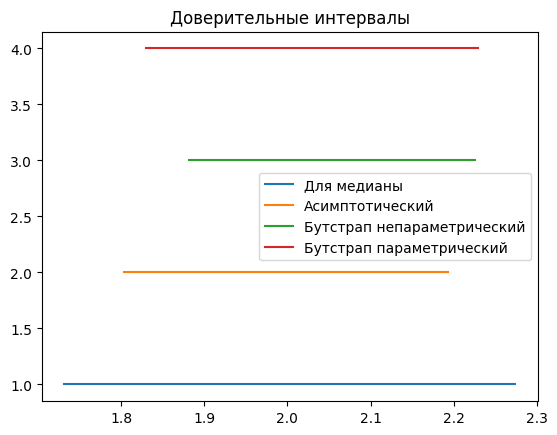

In [31]:

x1 = np.linspace(left, right, 100)
y1 = [1] * 100

x2 = np.linspace(left0, right0, 100)
y2 = [2] * 100

x3 = np.linspace(left3, right3, 100)
y3 = [3] * 100

x4 = np.linspace(left2, right2, 100)
y4 = [4] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)

plt.title("Доверительные интервалы")
plt.legend(["Для медианы", "Асимптотический", "Бутстрап непараметрический", "Бутстрап параметрический"])
